# Preprocessing and Modeling
Having cleaned and explored the wikikhow test data I will begin preprocessing the data for modeling, building the model architecture, training the model, and finally assessing model performance.

In [42]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,LSTM, Embedding, Dense, Attention, Concatenate, TimeDistributed, Masking
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import json

In [20]:
Data = pd.read_csv('Data/Wikihow_clean')
Data = Data.dropna(axis = 0)
Data.head()


,Unnamed: 0,headline,title,text,clean_text,cleaned_headline
0,0,"\r\nKeep related supplies in the same area.,\r...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess...",photographer keep necessary lens cords batteri...,_START_ keep related supplies in the same area...
1,1,\r\nCreate a sketch in the NeoPopRealist manne...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...,see image drawing develops step step however i...,_START_ create sketch in the neopoprealist man...
2,2,"\r\nGet a bachelor’s degree.,\r\nEnroll in a s...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...,possible become vfx artist without college deg...,_START_ get bachelor degree enroll in studio b...
3,3,\r\nStart with some experience or interest in ...,How to Become an Art Investor,The best art investors do their research on t...,best art investors research pieces art buy som...,_START_ start with some experience or interest...
4,4,"\r\nKeep your reference materials, sketches, a...",How to Be an Organized Artist2,"As you start planning for a project or work, ...",start planning project work likely gathering s...,_START_ keep your reference materials sketches...


In [21]:
len(Data)

208885

In [22]:
Data.iloc[1000,5]

'_START_ let your dwarf hamster get used to his new environment spend quiet time with your dwarf hamster talk to your dwarf hamster pick good time to tame your dwarf hamster wash your hands lower your hands into your dwarf hamster cage lift your dwarf hamster up and let him explore you hold your dwarf hamster each day learn the difference between biting and nibbling react properly if your dwarf hamster bites you do not stick your hand in your dwarf hamster cage  _END_'

## Preprocessing
Preprocessing the data involves splitting the data into training and test sets. I'll take eighty percent of the data for training and the rest for validation. After the data is split I initialize values for maximum text length and maximum summary length. I then tokenize the training and validation sets transforming each entry from a readable text to equally lengthed sequences of numbers that can be processed by a word embedding layer. This is done to both the texts and summaries with their respective lengths applied to both the training and test sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(Data['clean_text'], Data['cleaned_headline'], test_size = .2, random_state = 4, shuffle = True) 

In [24]:
print(len(X_train), len(X_test))

167108 41777


In [25]:
# max_len values set the maximum length for both the text and summary these values cames from previous Explorartory Data Analysis
max_len_text = 300
max_len_summary = 80

In [26]:
# The tokenizer creates a 'token' for each word which is a number that corresponds with that word
X_tokenizer = Tokenizer(filters = '!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n', lower = False)
X_tokenizer.fit_on_texts(list(X_train))

# Transforming the sequence of words into a corresponding sequence of their respective tokens
X_train = X_tokenizer.texts_to_sequences(X_train)
X_test = X_tokenizer.texts_to_sequences(X_test)

# Padding ensures that the sequences are all of the same size by adding empty tokens up to the max length 
X_train = pad_sequences(X_train,  maxlen=max_len_text, padding='post') 
X_test = pad_sequences(X_test, maxlen=max_len_text, padding='post')

# X_tokenizer.word_index['UNK'] = 0
# X_tokenizer.index_word[0] = 'UNK'

x_voc_size = len(X_tokenizer.word_index) +1

In [27]:
y_tokenizer = Tokenizer(filters = '!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n', lower = False)
y_tokenizer.fit_on_texts(list(y_train))


y_train = y_tokenizer.texts_to_sequences(y_train)
y_test = y_tokenizer.texts_to_sequences(y_test)

y_train = pad_sequences(y_train,  maxlen=max_len_summary, padding='post') 
y_test = pad_sequences(y_test, maxlen=max_len_summary, padding='post')

# y_tokenizer.word_index['UNK'] = 0
# y_tokenizer.index_word[0] = 'UNK'

y_voc_size = len(y_tokenizer.word_index) +1

In [37]:
type(reverse_input_word)

dict

In [28]:
reverse_target_word = y_tokenizer.index_word
reverse_input_word = X_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [44]:
def dict_to_json(dictionary,file_name):
    # python dictionary with key value pairs
    dict = dictionary

    # create json object from dictionary
    Json = json.dumps(dict)

    # open file for writing, "w" 
    f = open(file_name,"w")

    # write json object to file
    f.write(Json)

    # close file
    f.close()

In [70]:
# jsons only use keys for strings and values.
# This function will return integers where they're suppose to.
def integer_keys(dictionary):
    new_dict = {}
    value_list = [value for value in list(dictionary.values())]
    key_list = [int(key) for key in list(dictionary.keys())]
    for key, value in zip(key_list, value_list):
        new_dict[key] = value
    return new_dict

def integer_values(dictionary):
    new_dict = {}
    value_list = [int(value) for value in list(dictionary.values())]
    key_list = [key for key in list(dictionary.keys())]
    for key, value in zip(key_list, value_list):
        new_dict[key] = value
    return new_dict

In [71]:
#use to save or load token indexes rather than runnning the tokenizer everytime

#saving:
# dict_to_json(reverse_target_word, 'Data/reverse_target_word.json')
# dict_to_json(reverse_input_word, 'Data/reverse_input_word.json')
# dict_to_json(target_word_index, 'Data/target_word_index.json')


#loading
reverse_target_json = open('Data/reverse_target_word.json')
reverse_target_word = integer_keys(json.load(reverse_target_json))

reverse_input_json = open('Data/reverse_input_word.json')
reverse_input_word = integer_keys(json.load(reverse_input_json))

target_word_json = open('Data/target_word_index.json')
target_word_index = integer_values(json.load(target_word_json))

In [35]:
print(x_voc_size, y_voc_size)

140540 67947


In [36]:
x_voc_size = 140540
y_voc_size = 67947

## Embedding Layer

Rather than having my model develop it's own word embeddings, This model will use pre trained embeddings from the Word2Vec model. This will save time during training at the sacrifice of certain words not present in the Word2Vec vocabulary not having their own embeddings.  

In [11]:
import smart_open
smart_open.open = smart_open.smart_open
from gensim.models import Word2Vec
import gensim.downloader as api
v2w_model = api.load('word2vec-google-news-300')

C:\Users\Allen\anaconda3\lib\site-packages\smart_open\smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [12]:
embedding_matrix_X = np.zeros((x_voc_size, 300))
for word, index in X_tokenizer.word_index.items():
    if word not in v2w_model:
        continue
    else: embedding_matrix_X[index] = v2w_model[word]

In [13]:
embedding_matrix_y = np.zeros((y_voc_size, 300))
for word, index in y_tokenizer.word_index.items():
    if word not in v2w_model:
        continue
    else: embedding_matrix_y[index] = v2w_model[word]

### Embedding words not in pretrained embedding

In [14]:
Xemb_trained = []
Xemb_untrained = []
for word, index in X_tokenizer.word_index.items():
    if word not in v2w_model:
        Xemb_untrained.append(word)
    else: Xemb_trained.append(word)

In [15]:
# Percentage of unembedded words in vocabulary
print(len(Xemb_untrained) / (len(Xemb_untrained) + len(Xemb_trained)))

0.4374301795231217


## Creating lagged Y's
In order for the model to be properly trained. The Y variable needs to be lagged by one token so that the data is trained to predict the next word.

In [16]:
y_train_l = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:,1:]
y_test_l = y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:]

end_array_train = np.full((y_train.shape[0],1,1), 0)
end_array_test = np.full((y_test.shape[0],1,1), 0)

y_train_l = np.append(y_train_l, end_array_train, axis = 1)
y_test_l = np.append(y_test_l, end_array_test, axis = 1)

# print(y_train[0,:], y_train_l[0,:])

In [17]:
y_train_l.shape

(167108, 80, 1)

In [18]:
# saving training data so that it can be accessed from other notebooks or without running preprocessing steps
# np.save('Data/X_train_array',X_train)
# np.save('Data/X_test_array',X_test)
# np.save('Data/y_train_array',y_train)
# np.save('Data/y_test_array',y_test)
# np.save('Data/X_embedding_array', embedding_matrix_X)
# np.save('Data/y_embedding_array', embedding_matrix_y)
# np.save('Data/y_train_array',y_train)
# np.save('Data/y_test_array',y_test)
# np.save('Data/y_train_lagged_array',y_train_l)
# np.save('Data/y_test_lagged_array',y_test_l)

## Building the Model
With the data ready to be modeled I use functional Keras to begin constructing an architecture that can model the data. I set the latent dimension which determines the size of the word embeddings and begin with an input that fits the set shape of each text entry. 

In [11]:
X_train = np.load('Data/X_train_array.npy')
X_test = np.load('Data/X_test_array.npy')
y_train = np.load('Data/y_train_array.npy')
y_test = np.load('Data/y_test_array.npy')
embedding_matrix_X = np.load('Data/X_embedding_array.npy')
embedding_matrix_y = np.load('Data/y_embedding_array.npy')
y_train_l = np.load('Data/y_train_lagged_array.npy')
y_test_l = np.load('Data/y_test_lagged_array.npy')
x_voc_size = 140540
y_voc_size = 67947
max_len_text = 300
max_len_summary = 80

In [12]:
from tensorflow.keras import backend as K 

K.clear_session() 

# The latent dimension is the number of dimensions that each word embedding will correspond with
latent_dim = 300


#Embedding layer
Encoder_inputs = Input(shape=(max_len_text,))

mask = Masking(mask_value = 0)

encoder_mask = mask(Encoder_inputs)



Encoder_embedding = Embedding(x_voc_size, latent_dim,weights = [embedding_matrix_X],trainable=False)(encoder_mask) 


lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True, name = 'lstm1') 

encoder_output1, h_state, c_state = lstm1(Encoder_embedding) 

# Decoder

decoder_inputs = Input(shape=(None,))

decoder_mask = mask(decoder_inputs)

decoder_embedding = Embedding(y_voc_size, latent_dim,weights = [embedding_matrix_y],trainable=False)

dec_emb = decoder_embedding(decoder_mask) 


#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name = 'decoder_lstm') 
decoder_lstm_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[h_state, c_state]) 


#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_lstm_outputs) 

# Define the model
model_1 = Model([Encoder_inputs, decoder_inputs], decoder_outputs)

In [8]:
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
masking (Masking)               multiple             0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 300)     42162000    masking[0][0]                

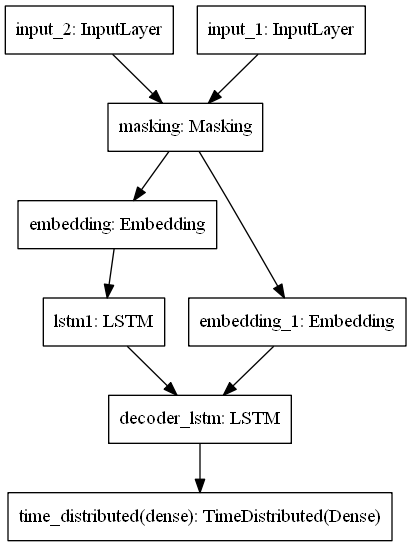

In [6]:
plot_model(model_1)

In [11]:
es = EarlyStopping(monitor='val_loss', mode='min', patience = 2, verbose=1)
cp_callback1 = ModelCheckpoint(filepath = 'LSTM1_model_train/cp.ckpt', save_best_only = True, verbose  = 1)

In [12]:
model_1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
history = model_1.fit([X_train,y_train], y_train_l,
                    epochs = 3, batch_size = 50, 
                    validation_data = ([X_test,y_test], y_test_l), callbacks = [es, cp_callback1])

#### This code allows me to save and reload weights and continue training from where I previously left off.

In [186]:
model_1.save('first_model.h5')

In [31]:
check_point_path1 ='LSTM1_model_train/cp.ckpt'
checkpoint_dir1 = os.path.dirname(check_point_path1)
latest1 = tf.train.latest_checkpoint(checkpoint_dir1)

model_1.load_weights(check_point_path1)

In [13]:
# model_1.save_weights('./checkpoint/my_checkpoint_model_1')
model_1.load_weights('./checkpoint/my_checkpoint_model_1')

The Model is separated into the encoder and decoder components so that the processes can be run separetly.

In [14]:
encoder_model1 = Model(inputs = Encoder_inputs, outputs = [encoder_output1, h_state, c_state])

decoder_h_state_input = Input(shape=(latent_dim,))
decoder_c_state_input = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

dec_emb2 = decoder_embedding(decoder_inputs)

decoder_outputs2 , h_state2, c_state2  = decoder_lstm(dec_emb2,initial_state=[decoder_h_state_input, decoder_c_state_input])

decoder_outputs2 = decoder_dense(decoder_outputs2)

decoder_model1 = Model([decoder_inputs] + [decoder_hidden_state_input, decoder_h_state_input, decoder_c_state_input],
                     [decoder_outputs2] + [h_state2, c_state2])

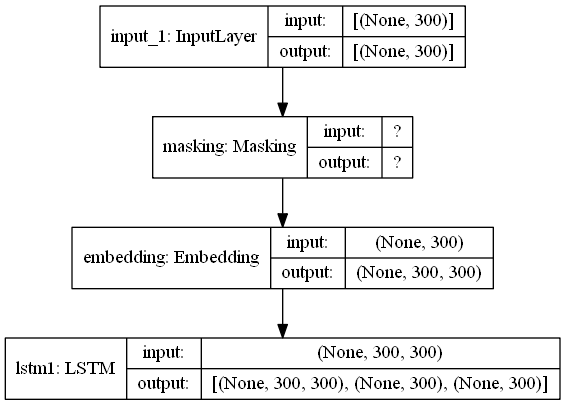

In [30]:
plot_model(encoder_model1, show_shapes = True)

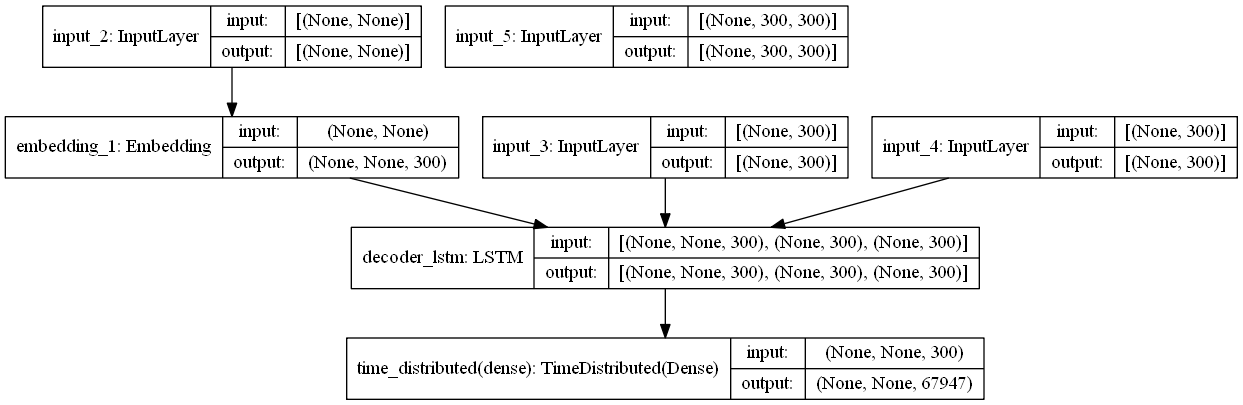

In [31]:
plot_model(decoder_model1, show_shapes = True)

# Adding Layers and Attention

Here I create a more complex model with two additional LSTM layers and an attention layer. 

In [7]:
from keras import backend as K 

K.clear_session() 

# The latent dimension is the number of dimensions that each word embedding will correspond with
latent_dim = 300 


#Embedding layer
Encoder_inputs = Input(shape=(max_len_text,))

mask = Masking(mask_value = 0)

encoder_mask = mask(Encoder_inputs)

Encoder_embedding = Embedding(x_voc_size, latent_dim,weights = [embedding_matrix_X],trainable=False)(encoder_mask) 


lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True, name = 'lstm1') 

encoder_output1, h1, c1 = lstm1(Encoder_embedding) 


lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True, name = 'lstm2') 

encoder_output2, h2, c2 = lstm2(encoder_output1) 


lstm3 = LSTM(latent_dim, return_state=True, return_sequences=True, name = 'lstm3') 

encoder_outputs, h_state, c_state = lstm3(encoder_output2) 


# Decoder

decoder_inputs = Input(shape=(None,))

decoder_mask = mask(decoder_inputs)

decoder_embedding = Embedding(y_voc_size, latent_dim,weights = [embedding_matrix_y],trainable=False)

dec_emb = decoder_embedding(decoder_mask) 


#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, name = 'decoder_lstm') 
decoder_lstm_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[h_state, c_state]) 


#Attention Layer
attention_output = Attention()([decoder_lstm_outputs, encoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis= -1, name='concat_layer')([decoder_lstm_outputs, attention_output])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model2 = Model([Encoder_inputs, decoder_inputs], decoder_outputs) 

In [189]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 400)]        0                                            
__________________________________________________________________________________________________
masking (Masking)               multiple             0           input_20[0][0]                   
                                                                 input_21[0][0]                   
__________________________________________________________________________________________________
embedding (Embedding)           (None, 400, 300)     11151900    masking[0][0]                

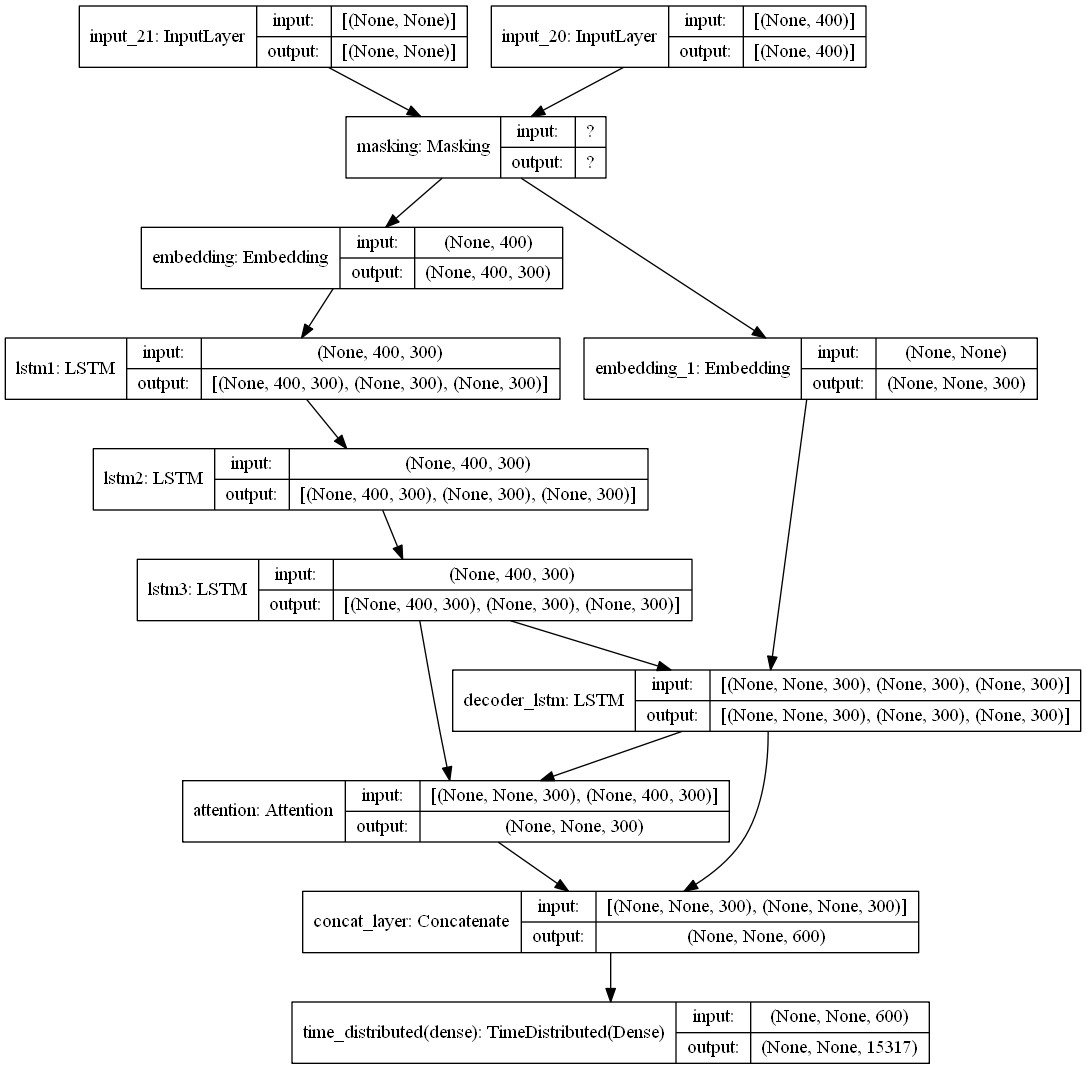

In [191]:
plot_model(model2, show_shapes = True,expand_nested = True )

In [8]:
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [9]:
es = EarlyStopping(monitor='val_loss', mode='min', patience = 3, verbose=1)
cp_callback2 = ModelCheckpoint(filepath = 'model_train2/cp.ckpt', save_best_only= True, verbose  = 1)

In [198]:
check_point_path ='model_train2/cp.ckpt'
checkpoint_dir = os.path.dirname(check_point_path)
latest = tf.train.latest_checkpoint(checkpoint_dir)

model2.load_weights(latest)

In [ ]:
history = model2.fit([X_train,y_train], y_train_l,
                    epochs = 2, batch_size = 50, 
                    validation_data = ([X_test,y_test], y_test_l), callbacks = [es, cp_callback2])

In [102]:
model2.save('Models/lstm_attention_model2', save_format = 'h5')

In [ ]:
model2.save_weights('./checkpoint/my_checkpoint_model2')
# model2.load_weights('./checkpoint/my_checkpoint_model2')

In [205]:
encoder_model2 = Model(inputs = Encoder_inputs, outputs = [encoder_outputs, h_state, c_state])

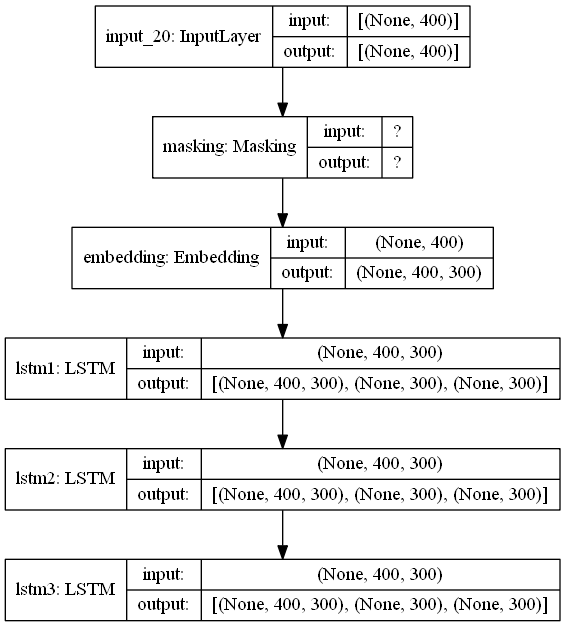

In [207]:
plot_model(encoder_model2, show_shapes = True, to_file = 'encoder_model2.png')

In [212]:
decoder_h_state_input = Input(shape=(latent_dim,))
decoder_c_state_input = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

decoder_mask2 = mask(decoder_inputs)

dec_emb2 = decoder_embedding(decoder_mask2)

decoder_outputs2 , h_state2, c_state2  = decoder_lstm(dec_emb2,initial_state=[decoder_h_state_input, decoder_c_state_input])

attention_output_inf = Attention()([decoder_outputs2, decoder_hidden_state_input]) 

decoder_concat_inf = Concatenate(axis= -1, name='concat')([decoder_outputs2, attention_output_inf])

decoder_outputs2 = decoder_dense(decoder_concat_inf)

decoder_model2 = Model([decoder_inputs] + [decoder_hidden_state_input, decoder_h_state_input, decoder_c_state_input],
                     [decoder_outputs2] + [h_state2, c_state2])

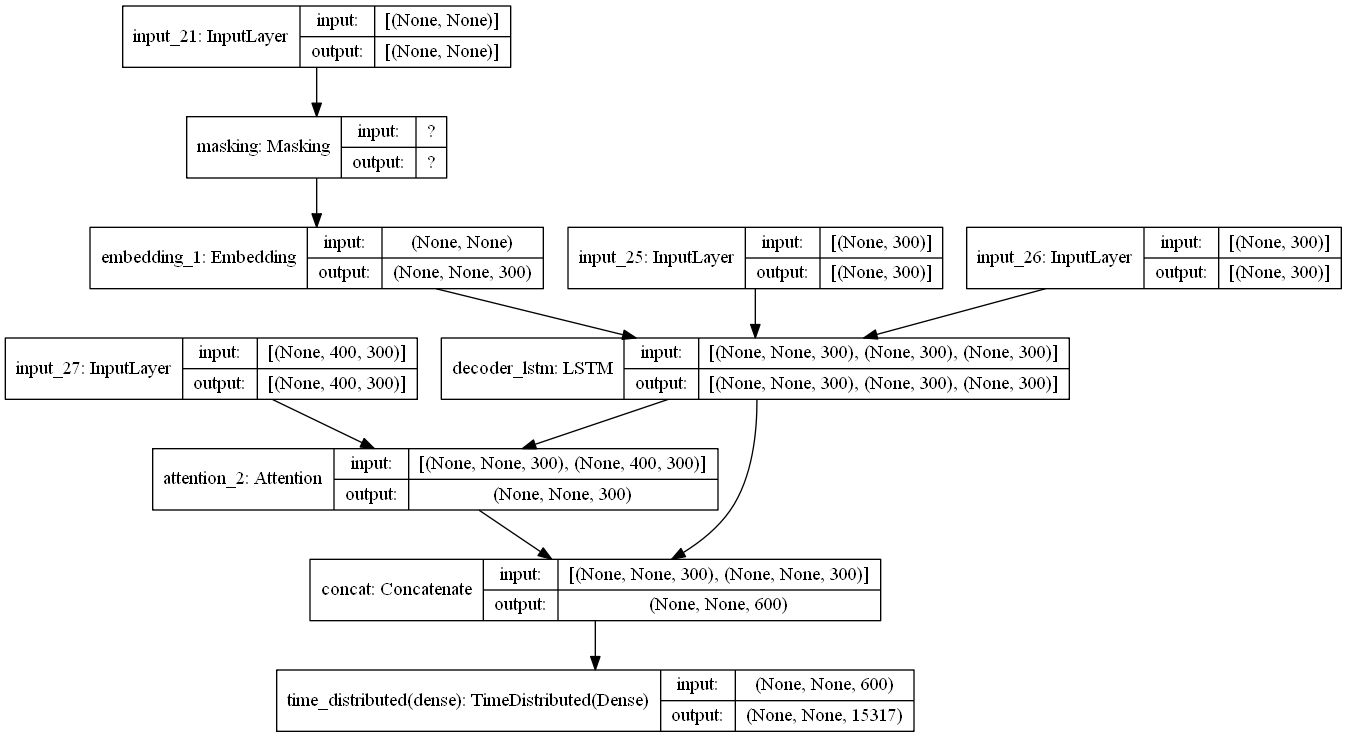

In [213]:
plot_model(decoder_model2, show_shapes = True, to_file = 'decoder_model.png')

# Assessing Performance

In [35]:
from nltk.translate.bleu_score import sentence_bleu

def read_input(input):
    sentence = ''
    for index in input:
        if index == 0:
            continue
        else:
            sentence = sentence + ' ' + reverse_input_word[index]
    return(sentence)



def read_target(target):
    sentence = ''
    for index in target:
        if index == 0:
            continue
        else:
            sentence = sentence + ' ' + reverse_target_word[index]
    return(sentence)



def decode_sequence(input_seq, encoder, decoder,latent_dim):
      
    
    encode_output, encode_h_state, encode_c_state = encoder.predict(input_seq)

    encode_h_state_r = np.array([encode_h_state[-1]])
    encode_c_state_r = np.array([encode_c_state[-1]])
    encode_output_r =  encode_output.reshape(1,300,latent_dim)
    
    
    target_seq = np.zeros((1,1))
    
    target_seq[0,0] = target_word_index['_START_']
    
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder.predict([target_seq] + [encode_output_r, encode_h_state_r, encode_c_state_r])
        
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
            sampled_token = '_UNK_'
        else:
            sampled_token = reverse_target_word[sampled_token_index]
        
        if(sampled_token!='_END_'):
            decoded_sentence += ' ' + sampled_token
            
        if (sampled_token == '_END_' or len(decoded_sentence.split()) >= (max_len_summary - 1)):
            stop_condition = True
                
        target_seq = np.zeros((1,1))
        target_seq[0,0] = sampled_token_index
        
        encode_h_state, encode_c_state = h, c
        
    return decoded_sentence


    

def observe_case(Index, Input, Output):
    Read_input = read_input(Input[Index])
    Read_target = read_target(Output[Index])
    Outcome = decode_sequence(Input[Index], encoder_model2, decoder_model2, latent_dim = 300)
    
    return (Read_input, Read_target, Outcome)

   epoch  training  testing
0      1    3.3000   3.1000
1      2    3.0200   2.9800
2      3    2.9400   2.9400
3      4    2.9100   2.9200
4      5    2.8800   2.9100
5      6    2.8700   2.9070
6      7    2.8600   2.9040
7      8    2.8542   2.8992
8      9    2.8454   2.8893
9     10    2.8368   2.8874


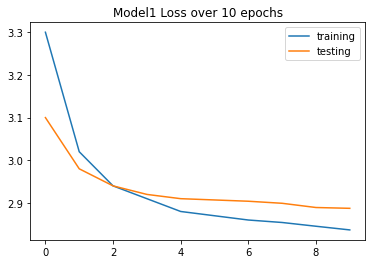

In [10]:
results1 = pd.read_csv('Data/model1_training_data.csv')

results1 = results1.drop('Unnamed: 0', axis = 1)
print(results1)
plt.figure()
results1['training'].plot()
results1['testing'].plot()
plt.title('Model1 Loss over 10 epochs')
plt.legend()

In [73]:
outcome0 = decode_sequence(X_train[0], encoder_model1, decoder_model1, latent_dim = 300)
outcome0

' the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the first and the'

In [75]:
read_target(y_train[0])

' _START_ set placemat on the table arrange your plate and napkin place your silverware on the placemat arrange your drinkware plan for your desserts and coffee _END_'

# Next Steps

At this stage, the model still is extracting very little information from the inputs. Although time consuming, more epochs could be run to continually gain more information during validation. Different layers such as Attention, Bidirectionallayers, and using the Beam search method for decoding could produce better results.  